In [2]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/USVProject/

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/.shortcut-targets-by-id/1zZ_ZmjBKjN3HmpYadLwvXXlHkCyi5dM9/USV_Project


In [3]:
import numpy as np
import PIL.Image as Image
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import tensorflow_hub as hub
from tensorflow.keras.preprocessing import image
import pandas as pd
import os
import xlrd
import math
import scipy
import scipy.stats as stats
import scipy.io.wavfile as wavfile
from scipy.signal import butter, lfilter, freqz
import librosa
import librosa.display
import cv2
import openpyxl
from openpyxl import Workbook

In [ ]:
pip install statistics_generator

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for statistics-generator: filename=statistics_generator-0.1-py3-none-any.whl size=4980 sha256=ac8c2236a4a0e8ce629f66cd3b7ffccababc7dec565ae7129aa721d4a435f160
  Stored in directory: /root/.cache/pip/wheels/c8/7b/02/7838fc5f945eb9e232f72f51ba3f120b64608c2bf6914c0596
Successfully built statistics-generator


In [4]:
class sample:
  def __init__(self, mother, name, sex, age, matgen, pupgen, rec_num, syls, time_between):
    self.mother = mother
    self.name = name
    self.sex = sex
    self.age = age
    self.matgen = matgen
    self.pupgen = pupgen
    self.rec_num = rec_num
    self.syls = syls
    self.time_between = time_between

In [5]:
%cd /content/drive/MyDrive/USVProject/

samples = np.load('model_prediction_recordings_1.npy', allow_pickle=True)

syl_num = []
for i in range(len(samples)):
  for j in range(len(samples[i].syls)):
    if np.max(samples[i].syls[j])<0.5:
      temp = 10
    else:
      temp = np.argmax(samples[i].syls[j])
    samples[i].syls[j] = []
    samples[i].syls[j] = temp
    syl_num.append(samples[i].syls[j])
    print(samples[i].syls[j])


#y = 2
#workbook = openpyxl.load_workbook('/content/drive/MyDrive/final_project/segmentation/New Segmentatio Data For Final Class_3B.xlsx')
#worksheet = workbook.worksheets[0]
#worksheet.insert_cols(16)
#cell_title = worksheet.cell(row=1, column=16)
#cell_title.value = 'Syllable number'
#for x in range(len(syl_num)):
#    cell_to_write = worksheet.cell(row=y, column=16)
#    cell_to_write.value = syl_num[x]
#    y += 1
#workbook.save('/content/drive/MyDrive/final_project/final_classification/New Segmentatio Data For Final Class_3B.xlsx')




/content/drive/.shortcut-targets-by-id/1zZ_ZmjBKjN3HmpYadLwvXXlHkCyi5dM9/USV_Project


FileNotFoundError: ignored

In [ ]:
F_WT_syls_4 = []
F_WT_syls_8 = []
F_WT_syls_10 = []
F_WT_syls_12 = []
F_HT_syls_4 = []
F_HT_syls_8 = []
F_HT_syls_10 = []
F_HT_syls_12 = []
M_WT_syls_4 = []
M_WT_syls_8 = []
M_WT_syls_10 = []
M_WT_syls_12 = []
M_HT_syls_4 = []
M_HT_syls_8 = []
M_HT_syls_10 = []
M_HT_syls_12 = []
for i in range(len(samples)):
  if samples[i].sex == 'F':
    if samples[i].pupgen == 'WT':
      if samples[i].age == 4:
        F_WT_syls_4.extend(samples[i].syls)
      elif samples[i].age == 8:
        F_WT_syls_8.extend(samples[i].syls)
      elif samples[i].age == 10:
        F_WT_syls_10.extend(samples[i].syls)
      else:
        F_WT_syls_12.extend(samples[i].syls)
    else:
      if samples[i].age == 4:
        F_HT_syls_4.extend(samples[i].syls)
      elif samples[i].age == 8:
        F_HT_syls_8.extend(samples[i].syls)
      elif samples[i].age == 10:
        F_HT_syls_10.extend(samples[i].syls)
      else:
        F_HT_syls_12.extend(samples[i].syls)
  elif samples[i].pupgen == 'WT':
    if samples[i].age == 4:
      M_WT_syls_4.extend(samples[i].syls)
    elif samples[i].age == 8:
      M_WT_syls_8.extend(samples[i].syls)
    elif samples[i].age == 10:
      M_WT_syls_10.extend(samples[i].syls)
    else:
      M_WT_syls_12.extend(samples[i].syls)
  else:
    if samples[i].age == 4:
      M_HT_syls_4.extend(samples[i].syls)
    elif samples[i].age == 8:
      M_HT_syls_8.extend(samples[i].syls)
    elif samples[i].age == 10:
      M_HT_syls_10.extend(samples[i].syls)
    else:
      M_HT_syls_12.extend(samples[i].syls)


In [ ]:
print(len(F_WT_syls_4))
print(len(F_WT_syls_8))
print(len(F_WT_syls_10))
print(len(F_WT_syls_12))
print(len(F_HT_syls_4))
print(len(F_HT_syls_8))
print(len(F_HT_syls_10))
print(len(F_HT_syls_12))
print(len(M_WT_syls_4))
print(len(M_WT_syls_8))
print(len(M_WT_syls_10))
print(len(M_WT_syls_12))
print(len(M_HT_syls_4))
print(len(M_HT_syls_8))
print(len(M_HT_syls_10))
print(len(M_HT_syls_12))

379
54
87
42
73
15
49
43
311
2
112
36
0
122
41
29


In [ ]:
print(F_HT_syls_4)

[3, 0, 1, 1, 1, 8, 8, 8, 10, 3, 10, 10, 8, 10, 9, 10, 8, 5, 9, 5, 9, 10, 5, 8, 10, 8, 9, 0, 9, 5, 10, 7, 9, 10, 10, 3, 10, 3, 3, 10, 10, 3, 8, 8, 10, 10, 8, 2, 10, 2, 10, 10, 1, 2, 3, 8, 3, 7, 3, 7, 3, 8, 10, 3, 10, 10, 10, 0, 3, 3, 10, 1, 1]


In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
#fig.suptitle('Syllable usage females - compatison by age and genotype')
axes[0, 0].hist([F_WT_syls_4, F_HT_syls_4], bins=np.arange(12)-0.5, density=True)
axes[0, 0].set_xticks(range(11))
axes[0, 0].set_title('Age 4 days', fontsize=18)
axes[0, 0].set_xlabel('Syllable typs', fontsize=14)
axes[0, 0].set_ylabel('Percentage', fontsize=14)
axes[0, 0].legend(['WT', 'HT'])
axes[0, 1].hist([F_WT_syls_8, F_HT_syls_8], bins=np.arange(12)-0.5, density=True)
axes[0, 1].set_xticks(range(11))
axes[0, 1].set_title('Age 8 days', fontsize=18)
axes[0, 1].set_xlabel('Syllable typs', fontsize=14)
axes[0, 1].set_ylabel('Percentage', fontsize=14)
axes[0, 1].legend(['WT', 'HT'])
axes[1, 0].hist([F_WT_syls_10, F_HT_syls_10], bins=np.arange(12)-0.5, density=True)
axes[1, 0].set_xticks(range(11))
axes[1, 0].set_title('Age 10 days', fontsize=18)
axes[1, 0].set_xlabel('Syllable typs', fontsize=14)
axes[1, 0].set_ylabel('Percentage', fontsize=14)
axes[1, 0].legend(['WT', 'HT'])
axes[1, 1].hist([F_WT_syls_12, F_HT_syls_12], bins=np.arange(12)-0.5, density=True)
axes[1, 1].set_xticks(range(11))
axes[1, 1].set_title('Age 12 days', fontsize=18)
axes[1, 1].set_xlabel('Syllable typs', fontsize=14)
axes[1, 1].set_ylabel('Percentage', fontsize=14)
axes[1, 1].legend(['WT', 'HT'])
plt.savefig('female_mice_hist')

NameError: ignored

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


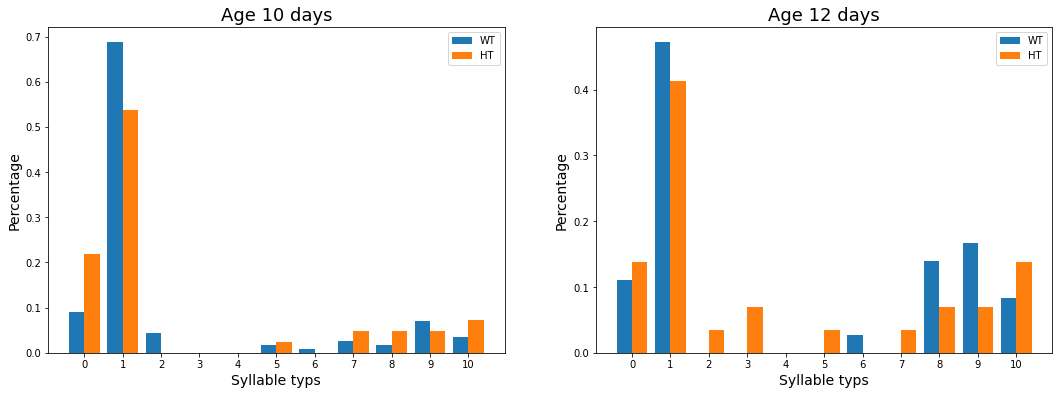

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6))
#fig.suptitle('Syllable usage females - compatison by age and genotype')
axes[0].hist([M_WT_syls_10, M_HT_syls_10], bins=np.arange(12)-0.5, density=True)
axes[0].set_xticks(range(11))
axes[0].set_title('Age 10 days', fontsize=18)
axes[0].set_xlabel('Syllable typs', fontsize=14)
axes[0].set_ylabel('Percentage', fontsize=14)
axes[0].legend(['WT', 'HT'])
axes[1].hist([M_WT_syls_12, M_HT_syls_12], bins=np.arange(12)-0.5, density=True)
axes[1].set_xticks(range(11))
axes[1].set_title('Age 12 days', fontsize=18)
axes[1].set_xlabel('Syllable typs', fontsize=14)
axes[1].set_ylabel('Percentage', fontsize=14)
axes[1].legend(['WT', 'HT'])
plt.savefig('male_mice_hist')

In [ ]:
F_WT_4_sylCount = []
F_HT_4_sylCount = []
for i in range(11):
  F_WT_4_sylCount.append(F_WT_syls_4.count(i))
  F_HT_4_sylCount.append(F_HT_syls_4.count(i))
del F_WT_4_sylCount[4]
del F_HT_4_sylCount[4]

F_WT_8_sylCount = []
F_HT_8_sylCount = []
for i in range(11):
  F_WT_8_sylCount.append(F_WT_syls_8.count(i))
  F_HT_8_sylCount.append(F_HT_syls_8.count(i))
del F_WT_8_sylCount[4]
del F_HT_8_sylCount[4]
del F_WT_8_sylCount[4]
del F_HT_8_sylCount[4]
del F_WT_8_sylCount[4]
del F_HT_8_sylCount[4]

F_WT_10_sylCount = []
F_HT_10_sylCount = []
for i in range(11):
  F_WT_10_sylCount.append(F_WT_syls_10.count(i))
  F_HT_10_sylCount.append(F_HT_syls_10.count(i))

F_WT_12_sylCount = []
F_HT_12_sylCount = []
for i in range(11):
  F_WT_12_sylCount.append(F_WT_syls_12.count(i))
  F_HT_12_sylCount.append(F_HT_syls_12.count(i))
del F_WT_12_sylCount[6]
del F_HT_12_sylCount[6]
del F_WT_12_sylCount[6]
del F_HT_12_sylCount[6]

In [ ]:
tot1 = sum(F_WT_4_sylCount)
tot2 = sum(F_HT_4_sylCount)
for i in range(len(F_WT_4_sylCount)):
  F_WT_4_sylCount[i] = F_WT_4_sylCount[i]*100/tot1
  F_HT_4_sylCount[i] = F_HT_4_sylCount[i]*100/tot2

tot1 = sum(F_WT_8_sylCount)
tot2 = sum(F_HT_8_sylCount)
for i in range(len(F_WT_8_sylCount)):
  F_WT_8_sylCount[i] = F_WT_8_sylCount[i]*100/tot1
  F_HT_8_sylCount[i] = F_HT_8_sylCount[i]*100/tot2

tot1 = sum(F_WT_10_sylCount)
tot2 = sum(F_HT_10_sylCount)
for i in range(len(F_WT_10_sylCount)):
  F_WT_10_sylCount[i] = F_WT_10_sylCount[i]*100/tot1
  F_HT_10_sylCount[i] = F_HT_10_sylCount[i]*100/tot2

tot1 = sum(F_WT_12_sylCount)
tot2 = sum(F_HT_12_sylCount)
for i in range(len(F_WT_12_sylCount)):
  F_WT_12_sylCount[i] = F_WT_12_sylCount[i]*100/tot1
  F_HT_12_sylCount[i] = F_HT_12_sylCount[i]*100/tot2

In [ ]:
conTable4 = np.array([[F_WT_4_sylCount], [F_HT_4_sylCount]])
conTable8 = np.array([[F_WT_8_sylCount], [F_HT_8_sylCount]])
conTable10 = np.array([[F_WT_10_sylCount], [F_HT_10_sylCount]])
conTable12 = np.array([[F_WT_12_sylCount], [F_HT_12_sylCount]])

In [ ]:
stat, p4, dof, exp = stats.chi2_contingency(conTable4)
stat, p8, dof, exp = stats.chi2_contingency(conTable8)
stat, p10, dof, exp = stats.chi2_contingency(conTable10)
stat, p12, dof, exp = stats.chi2_contingency(conTable12)

In [ ]:
print(p4)
print(p8)
print(p10)
print(p12)

4.070705076755944e-08
1.173367023942348e-10
0.006871572599243244
0.03490126952672985


In [ ]:
M_WT_10_sylCount = []
M_HT_10_sylCount = []
for i in range(11):
  M_WT_10_sylCount.append(M_WT_syls_10.count(i))
  M_HT_10_sylCount.append(M_HT_syls_10.count(i))
del M_WT_10_sylCount[3]
del M_HT_10_sylCount[3]
del M_WT_10_sylCount[3]
del M_HT_10_sylCount[3]

M_WT_12_sylCount = []
M_HT_12_sylCount = []
for i in range(11):
  M_WT_12_sylCount.append(M_WT_syls_12.count(i))
  M_HT_12_sylCount.append(M_HT_syls_12.count(i))
del M_WT_12_sylCount[4]
del M_HT_12_sylCount[4]

In [ ]:
tot1 = sum(M_WT_10_sylCount)
tot2 = sum(M_HT_10_sylCount)
for i in range(len(M_WT_10_sylCount)):
  M_WT_10_sylCount[i] = M_WT_10_sylCount[i]*100/tot1
  M_HT_10_sylCount[i] = M_HT_10_sylCount[i]*100/tot2

tot1 = sum(M_WT_12_sylCount)
tot2 = sum(M_HT_12_sylCount)
for i in range(len(M_WT_12_sylCount)):
  M_WT_12_sylCount[i] = M_WT_12_sylCount[i]*100/tot1
  M_HT_12_sylCount[i] = M_HT_12_sylCount[i]*100/tot2

In [ ]:
conTable10m = np.array([[M_WT_10_sylCount], [M_HT_10_sylCount]])
conTable12m = np.array([[M_WT_12_sylCount], [M_HT_12_sylCount]])

In [ ]:
stat, p10M, dof, exp = stats.chi2_contingency(conTable10m)
stat, p12M, dof, exp = stats.chi2_contingency(conTable12m)

In [ ]:
print(p10M)
print(p12M)

0.03454163041314885
0.0008038491948960463
